# Modeling and Evaluation

### Answer business requirement 2:

* The client is seeking an ML system capable of accurately predicting whether a cherry leaf is healthy or affected by powdery mildew.

## Inputs

* inputs/cherryleaves_database/cherry-leaves/train
* inputs/cherryleaves_database/cherry-leaves/validation
* inputs/cherryleaves_database/cherry-leaves/test
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file 

## Additional Comments

* Evaluating the optimal softmax model without utilizing the early stopping technique.


---

# Set Data Directory

### Import packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Set working directory

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/my-fifth-project/attachments'

In [4]:
os.chdir('/workspace/my-fifth-project')
print("You set a new current directory")

You set a new current directory


In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/my-fifth-project'

### Set input directories

* Set train, validation and test paths.

In [11]:
my_data_dir = 'inputs/cherryleaves_database/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [124]:
version = 'v2'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


### Set labels

In [125]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['healthy', 'powdery_mildew']


### Set image shape

In [126]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(200, 200, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




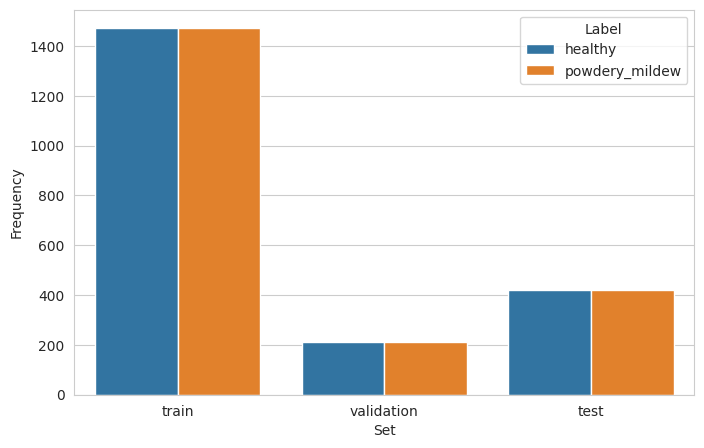

In [127]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

### Pie chart for dataset distribution

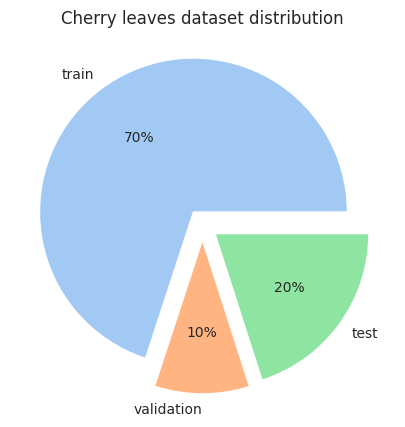

In [128]:
plt.figure(figsize=(8,5))
set_labels = df_freq['Set'].unique()
colors = sns.color_palette('pastel')[:len(set_labels)]
explode = [0.1] * len(set_labels)

set_frequencies = []
for set_label in set_labels:
    set_frequencies.append(df_freq[df_freq['Set'] == set_label]['Frequency'].sum())

plt.pie(set_frequencies, labels=set_labels, colors=colors, explode=explode, autopct='%.0f%%')
plt.title('Cherry leaves dataset distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

### ImageDataGenerator

In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Intiatize ImageDataGenerator

In [130]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

### Augment training image dataset

In [131]:
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment validation image dataset

In [132]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment test image dataset

In [133]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented training image

(20, 200, 200, 3)
(20, 200, 200, 3)
(20, 200, 200, 3)


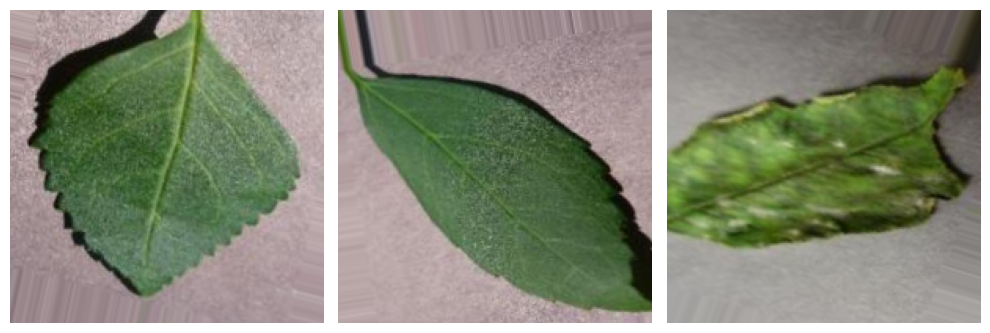

In [134]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img, label = train_set.next()
    print(img.shape)
    axes[i].imshow(img[0])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Plot augmented validation images

(20, 200, 200, 3)
(20, 200, 200, 3)
(20, 200, 200, 3)


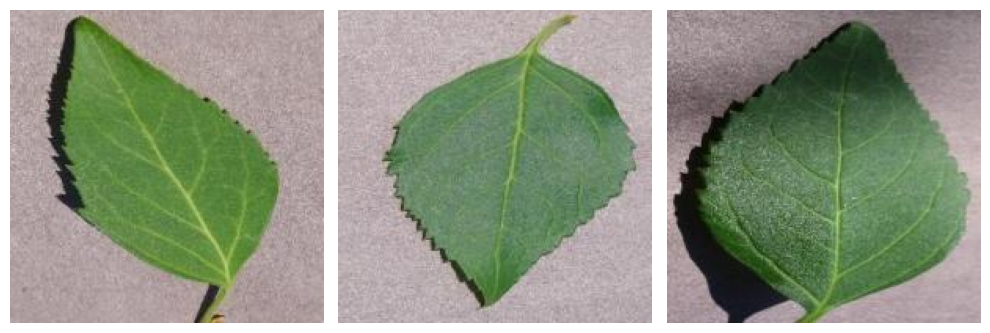

In [135]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img, label = validation_set.next()
    print(img.shape)
    axes[i].imshow(img[3])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Plot augmented test images

(20, 200, 200, 3)
(20, 200, 200, 3)
(20, 200, 200, 3)


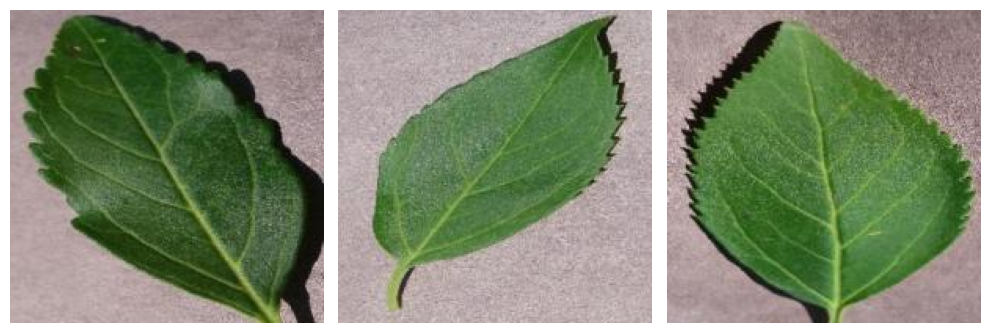

In [136]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img, label = test_set.next()
    print(img.shape)
    axes[i].imshow(img[0])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Save class_indices

In [137]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

---

# Model creation

* Import packages:

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad, SGD

* Model:

In [143]:
def create_tf_model():
    model = Sequential()

    ### input layer
    model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ### hidden layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))      
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.3))

    ### output
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

* Model Summary:

In [144]:
create_tf_model().summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 21, 21, 64)       

In [145]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

* Fit model for model training:

In [146]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
147/147 [==============================] - 63s 423ms/step - loss: 0.2708 - accuracy: 0.8748 - val_loss: 0.0322 - val_accuracy: 0.9881
Epoch 2/25
147/147 [==============================] - 62s 424ms/step - loss: 0.0802 - accuracy: 0.9709 - val_loss: 0.0125 - val_accuracy: 0.9952
Epoch 3/25
147/147 [==============================] - 62s 424ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.0055 - val_accuracy: 0.9976
Epoch 4/25
147/147 [==============================] - 64s 434ms/step - loss: 0.0385 - accuracy: 0.9870 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 5/25
147/147 [==============================] - 63s 425ms/step - loss: 0.0459 - accuracy: 0.9832 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/25
147/147 [==============================] - 61s 418ms/step - loss: 0.0170 - accuracy: 0.9935 - val_loss: 0.0058 - val_accuracy: 0.9976
Epoch 7/25
147/147 [==============================] - 62s 420ms/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 3.6929e-04 - va

* Save model:

In [292]:
model.save('outputs/v1/powdery_mildew_detector_model_SGD+.h5')

---

# Model Performace

### Model learning curve

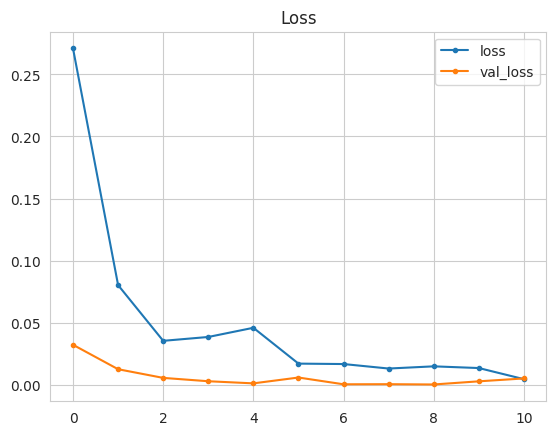

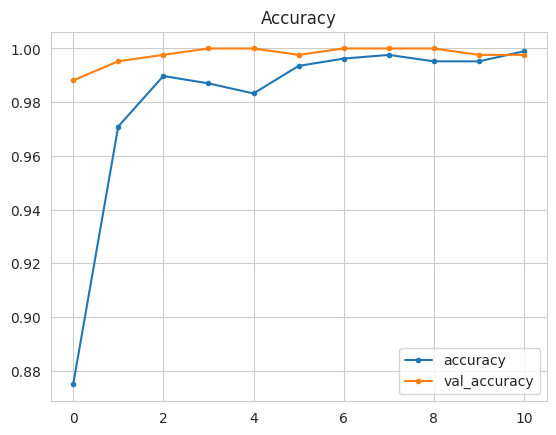

In [147]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

### Model Evaluation

* Import packages:

In [148]:
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

* Load saved model:

In [149]:
from keras.models import load_model
model = load_model('outputs/v2/powdery_mildew_detector_model_Sigmoid_Adam.h5')

* Evaluate model on test set:

In [150]:
evaluation = model.evaluate(test_set)

 1/43 [..............................] - ETA: 8s - loss: 1.2135e-04 - accuracy: 1.0000

43/43 [==============================] - 4s 95ms/step - loss: 0.0293 - accuracy: 0.9976


* Set accuracy variables:

In [151]:
validation_set.reset()

x_true, y_true = next(test_set)
preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels

* Confusion matrix:

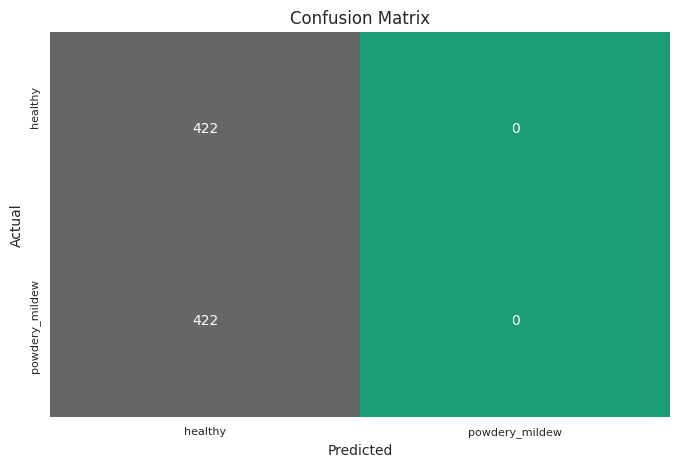

In [152]:
cm = confusion_matrix(y_true,y_pred)

classes=list(test_set.class_indices.keys()) 
length=len(classes)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Dark2', cbar=False)       
plt.xticks(np.arange(length)+.5, classes, rotation= 0, fontsize=8)
plt.yticks(np.arange(length)+.3, classes, rotation=90, fontsize=8)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(f'{file_path}/confusion_matrix.png',
            bbox_inches='tight', dpi=150)
plt.show()

* Classification reports:

In [153]:
print('Classification Report:\n----------------------\n')
print(classification_report(y_true, y_pred, target_names=labels))

Classification Report:
----------------------

                precision    recall  f1-score   support

       healthy       0.50      1.00      0.67       422
powdery_mildew       0.00      0.00      0.00       422

      accuracy                           0.50       844
     macro avg       0.25      0.50      0.33       844
  weighted avg       0.25      0.50      0.33       844



/workspace/my-fifth-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/my-fifth-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/my-fifth-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

/workspace/my-fifth-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/my-fifth-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/my-fifth-project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

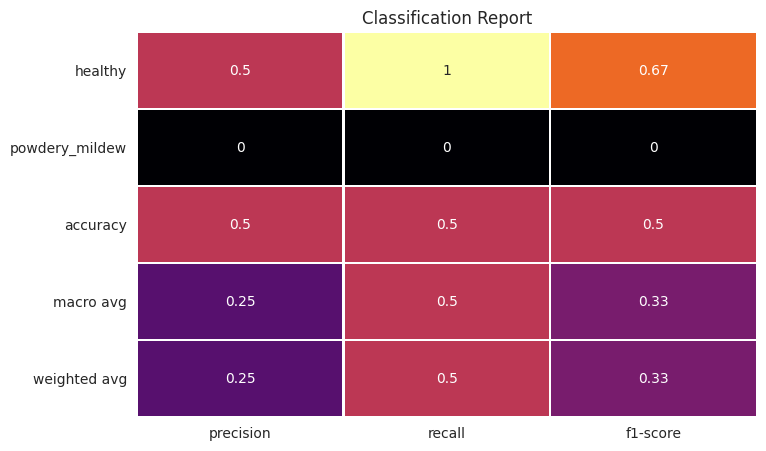

In [154]:
import matplotlib.pyplot as plt
import matplotlib as mpl
clf_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="inferno", cbar=False, linewidths=1)
plt.title('Classification Report')

plt.savefig('outputs/v4/classification_report.png')

* Save evaluation pickle:

In [155]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v2/evaluation.pkl")

['outputs/v2/evaluation.pkl']

### Predict on new data

* Load a random image as PIL:

Image shape: (200, 200), Image mode: RGB


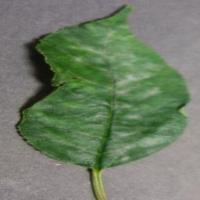

In [156]:
from tensorflow.keras.preprocessing import image

pointer = 37
label = labels[1] # select Healthy [0] or Infected [1]

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

* Convert image to array and prepare for prediction:

In [157]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)
print(my_image.shape)

(1, 200, 200, 3)


* Predict class probabilities:

In [158]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba < 0.5]

if pred_class == target_map[1]:
    pred_proba = 1 - pred_proba

print(f"{pred_class} {round(pred_proba*100, 2)}%")

powdery_mildew 100.0%
